# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Installation-of-tensorflow-and-keras" data-toc-modified-id="Installation-of-tensorflow-and-keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installation of tensorflow and keras</a></div><div class="lev1 toc-item"><a href="#Importing-standard-deep-learning-libraries:" data-toc-modified-id="Importing-standard-deep-learning-libraries:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing standard deep learning libraries:</a></div><div class="lev1 toc-item"><a href="#Stochastic-gradient-descent-optimizer:" data-toc-modified-id="Stochastic-gradient-descent-optimizer:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stochastic gradient descent optimizer:</a></div><div class="lev1 toc-item"><a href="#Testing-trained-data-(SGD)" data-toc-modified-id="Testing-trained-data-(SGD)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing trained data (SGD)</a></div><div class="lev1 toc-item"><a href="#SGD-with-momentum-optimizer:" data-toc-modified-id="SGD-with-momentum-optimizer:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SGD with momentum optimizer:</a></div><div class="lev1 toc-item"><a href="#Testing-trained-data-(SGD-w/-momentum)" data-toc-modified-id="Testing-trained-data-(SGD-w/-momentum)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testing trained data (SGD w/ momentum)</a></div><div class="lev1 toc-item"><a href="#Adam-optimizer-(Neural-network-training):" data-toc-modified-id="Adam-optimizer-(Neural-network-training):-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adam optimizer (Neural network training):</a></div><div class="lev1 toc-item"><a href="#Testing-trained-data-(adam)" data-toc-modified-id="Testing-trained-data-(adam)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testing trained data (adam)</a></div><div class="lev1 toc-item"><a href="#Adadelta-optimizer" data-toc-modified-id="Adadelta-optimizer-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Adadelta optimizer</a></div><div class="lev1 toc-item"><a href="#Testing-trained-data-(Adadelta)" data-toc-modified-id="Testing-trained-data-(Adadelta)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Testing trained data (Adadelta)</a></div>

# Installation of tensorflow and keras

In [1]:
import pip
pip.main(['install', '-U', 'keras'])
pip.main(['install', '-U', 'tensorflow'])

Requirement already up-to-date: pyyaml in /opt/conda/lib/python3.6/site-packages (from keras)
  Found existing installation: numpy 1.13.1
    Uninstalling numpy-1.13.1:
      Successfully uninstalled numpy-1.13.1
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
      Successfully uninstalled six-1.10.0
  Using cached numpy-1.13.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached six-1.11.0-py2.py3-none-any.whl
Requirement already up-to-date: bleach==1.5.0 in /opt/conda/lib/python3.6/site-packages (from tensorflow-tensorboard<0.5.0,>=0.4.0rc1->tensorflow)
Requirement already up-to-date: html5lib==0.9999999 in /opt/conda/lib/python3.6/site-packages (from tensorflow-tensorboard<0.5.0,>=0.4.0rc1->tensorflow)
  Running setup.py bdist_wheel for markdown: started
  Running setup.py bdist_wheel for markdown: finished with status 'done'
  Stored in directory

0

# Importing standard deep learning libraries:

In [2]:
import numpy as np
import tensorflow as tf
import scipy
import keras as kr
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from matplotlib import pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D
from keras import optimizers
from keras.datasets import mnist
import time

/opt/conda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
np.random.seed(123) 
# This makes sure that the same set of random variables is generated in each run 
#Repeatability is maintained

# Stochastic gradient descent optimizer:

In [4]:
t_SGD = time.time()
(X_train_SGD, y_train_SGD), (X_test_SGD, y_test_SGD) = mnist.load_data()

X_train_SGD = X_train_SGD.reshape(X_train_SGD.shape[0], 28, 28,1)
X_test_SGD = X_test_SGD.reshape(X_test_SGD.shape[0], 28, 28,1)
X_train_SGD = X_train_SGD.astype('float32')
X_test_SGD = X_test_SGD.astype('float32')
X_train_SGD /= 255
X_test_SGD /= 255

Y_train_SGD = np_utils.to_categorical(y_train_SGD, 10)
Y_test_SGD = np_utils.to_categorical(y_test_SGD, 10)

network_SGD = Sequential() #defining the type of neural network

#Adding layers to the neural network:
network_SGD.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_SGD.add(BatchNormalization())
network_SGD.add(MaxPooling2D(pool_size=(2,2)))
network_SGD.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_SGD.add(BatchNormalization())
network_SGD.add(MaxPooling2D(pool_size=(2,2)))
network_SGD.add(BatchNormalization())

#Post processing of layers:
network_SGD.add(Dropout(0.25))
network_SGD.add(Flatten())
network_SGD.add(Dense(128, activation='relu')) #activation function used
network_SGD.add(Dropout(0.5))
network_SGD.add(Dense(10, activation='softmax')) #activation function used

network_SGD.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

results_SGD = network_SGD.fit(X_train_SGD, Y_train_SGD, batch_size=32, nb_epoch=20, verbose=1)
elapsed_SGD = time.time() - t_SGD
print("Neural network training time is: {0:1.4f}".format(elapsed_SGD),"seconds")

11493376/11490434 [==============================] - 3s 0us/step


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 126s 2ms/step - loss: 0.3287 - acc: 0.8962
Epoch 2/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1269 - acc: 0.9615
Epoch 3/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0990 - acc: 0.9705
Epoch 4/20
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0804 - acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0690 - acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0649 - acc: 0.9804
Epoch 7/20
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0584 - acc: 0.9816
Epoch 8/20
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0547 - acc: 0.9834
Epoch 9/20
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0489 - acc: 0.9851
Epoch 10/20
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0479 - a

# Testing trained data (SGD)

When evaluated on the MNIST test dataset, the loss is: 0.0218
When evaluated on the MNIST test dataset, the acccuracy is: 0.9929


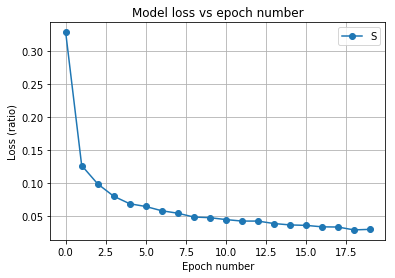

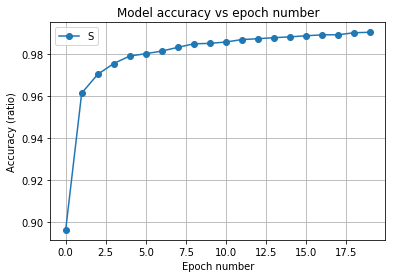

Evaluation and plotting runtime is: 8.2898 seconds


In [5]:
t_test_SGD = time.time()
score_SGD = network_SGD.evaluate(X_test_SGD, Y_test_SGD, verbose=0)
print("When evaluated on the MNIST test dataset, the loss is: {0:1.4f}".format(score_SGD[0]))
print("When evaluated on the MNIST test dataset, the acccuracy is: {0:1.4f}".format(score_SGD[1]))
#Loss versus epochs
plt.plot(results_SGD.history['loss'],'-o')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend("SGD")
plt.grid()
plt.show()

#Accuracy versus epochs
plt.plot(results_SGD.history['acc'],'-o')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (ratio)")
plt.title("Model accuracy vs epoch number")
plt.legend("SGD")
plt.grid()
plt.show()

elapsed_test_SGD = time.time() - t_test_SGD
print("Evaluation and plotting runtime is: {0:1.4f}".format(elapsed_test_SGD),"seconds")

# SGD with momentum optimizer:

In [6]:
t_SGD_mom = time.time()
(X_train_SGD_mom, y_train_SGD_mom), (X_test_SGD_mom, y_test_SGD_mom) = mnist.load_data()

X_train_SGD_mom = X_train_SGD_mom.reshape(X_train_SGD_mom.shape[0], 28, 28,1)
X_test_SGD_mom = X_test_SGD_mom.reshape(X_test_SGD_mom.shape[0], 28, 28,1)
X_train_SGD_mom = X_train_SGD_mom.astype('float32')
X_test_SGD_mom = X_test_SGD_mom.astype('float32')
X_train_SGD_mom /= 255
X_test_SGD_mom /= 255

Y_train_SGD_mom = np_utils.to_categorical(y_train_SGD_mom, 10)
Y_test_SGD_mom = np_utils.to_categorical(y_test_SGD_mom, 10)

network_SGD_mom = Sequential() #defining the type of neural network

#Adding layers to the neural network:
network_SGD_mom.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_SGD_mom.add(BatchNormalization())
network_SGD_mom.add(MaxPooling2D(pool_size=(2,2)))
network_SGD_mom.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_SGD_mom.add(BatchNormalization())
network_SGD_mom.add(MaxPooling2D(pool_size=(2,2)))
network_SGD_mom.add(BatchNormalization())

#Post processing of layers:
network_SGD_mom.add(Dropout(0.25))
network_SGD_mom.add(Flatten())
network_SGD_mom.add(Dense(128, activation='relu')) #activation function used
network_SGD_mom.add(Dropout(0.5))
network_SGD_mom.add(Dense(10, activation='softmax')) #activation function used

opt = optimizers.SGD(lr=0.01, momentum=0.95, decay=1e-6, nesterov=False)

network_SGD_mom.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

results_SGD_mom = network_SGD_mom.fit(X_train_SGD_mom, Y_train_SGD_mom, batch_size=32, nb_epoch=20, verbose=1)
elapsed_SGD_mom = time.time() - t_SGD_mom
print("Neural network training time is: {0:1.4f}".format(elapsed_SGD_mom),"seconds")
# see what happens when you use optimize.minimize

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2072 - acc: 0.9380
Epoch 2/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0868 - acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0685 - acc: 0.9803
Epoch 4/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0578 - acc: 0.9829
Epoch 5/20
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0542 - acc: 0.9844
Epoch 6/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0475 - acc: 0.9859
Epoch 7/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0440 - acc: 0.9871
Epoch 8/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0417 - acc: 0.9875
Epoch 9/20
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0395 - acc: 0.9883
Epoch 10/20
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0361 - a

# Testing trained data (SGD w/ momentum)

When evaluated on the MNIST test dataset, the loss is: 0.0323
When evaluated on the MNIST test dataset, the acccuracy is: 0.9923


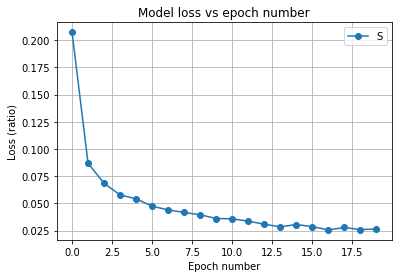

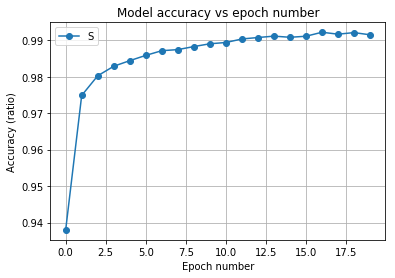

Evaluation and plotting runtime is: 8.1990 seconds


In [7]:
t_test_SGD_mom = time.time()
score_SGD_mom = network_SGD_mom.evaluate(X_test_SGD_mom, Y_test_SGD_mom, verbose=0)
print("When evaluated on the MNIST test dataset, the loss is: {0:1.4f}".format(score_SGD_mom[0]))
print("When evaluated on the MNIST test dataset, the acccuracy is: {0:1.4f}".format(score_SGD_mom[1]))
#Loss versus epochs
plt.plot(results_SGD_mom.history['loss'],'-o')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend("SGD with Momentum")
plt.grid()
plt.show()

#Accuracy versus epochs
plt.plot(results_SGD_mom.history['acc'],'-o')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (ratio)")
plt.title("Model accuracy vs epoch number")
plt.legend("SGD with Momentum")
plt.grid()
plt.show()

elapsed_test_SGD_mom = time.time() - t_test_SGD_mom
print("Evaluation and plotting runtime is: {0:1.4f}".format(elapsed_test_SGD_mom),"seconds")

# Adam optimizer (Neural network training):

In [8]:
t_adam = time.time()
(X_train_adam, y_train_adam), (X_test_adam, y_test_adam) = mnist.load_data()

X_train_adam = X_train_adam.reshape(X_train_adam.shape[0], 28, 28,1)
X_test_adam = X_test_adam.reshape(X_test_adam.shape[0], 28, 28,1)
X_train_adam = X_train_adam.astype('float32')
X_test_adam = X_test_adam.astype('float32')
X_train_adam /= 255
X_test_adam /= 255

Y_train_adam = np_utils.to_categorical(y_train_adam, 10)
Y_test_adam = np_utils.to_categorical(y_test_adam, 10)

network = Sequential() #defining the type of neural network

#Adding layers to the neural network:
network.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(BatchNormalization())

#Post processing of layers:
network.add(Dropout(0.25))
network.add(Flatten())
network.add(Dense(128, activation='relu')) #activation function used
network.add(Dropout(0.5))
network.add(Dense(10, activation='softmax')) #activation function used

network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

results_adam = network.fit(X_train_adam, Y_train_adam, batch_size=32, nb_epoch=20, verbose=1)
elapsed_adam = time.time() - t_adam
print("Neural network training time is: {0:1.4f}".format(elapsed_adam),"seconds")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1959 - acc: 0.9401
Epoch 2/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0822 - acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0655 - acc: 0.9809
Epoch 4/20
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0561 - acc: 0.9829
Epoch 5/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0503 - acc: 0.9854
Epoch 6/20
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0464 - acc: 0.9861
Epoch 7/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0410 - acc: 0.9881
Epoch 8/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0375 - acc: 0.9887
Epoch 9/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0344 - acc: 0.9897
Epoch 10/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0330 - a

# Testing trained data (adam)

When evaluated on the MNIST test dataset, the loss is: 0.0244
When evaluated on the MNIST test dataset, the acccuracy is: 0.9932


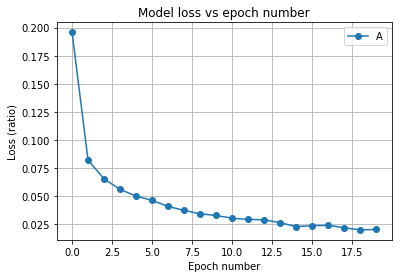

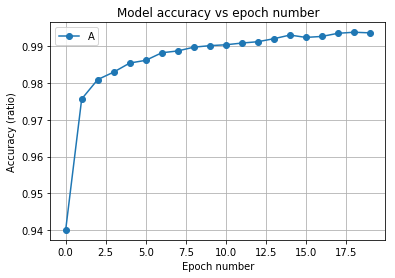

Evaluation and plotting runtime is: 8.6509 seconds


In [9]:
t_test_adam = time.time()
score_adam = network.evaluate(X_test_adam, Y_test_adam, verbose=0)
print("When evaluated on the MNIST test dataset, the loss is: {0:1.4f}".format(score_adam[0]))
print("When evaluated on the MNIST test dataset, the acccuracy is: {0:1.4f}".format(score_adam[1]))
#Loss versus epochs
plt.plot(results_adam.history['loss'],'-o')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend("Adam")
plt.grid()
plt.show()

#Accuracy versus epochs
plt.plot(results_adam.history['acc'],'-o')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (ratio)")
plt.title("Model accuracy vs epoch number")
plt.legend("Adam")
plt.grid()
plt.show()

elapsed_test_adam = time.time() - t_test_adam
print("Evaluation and plotting runtime is: {0:1.4f}".format(elapsed_test_adam),"seconds")

# Adadelta optimizer

In [10]:
t_adadelta = time.time()
(X_train_adadelta, y_train_adadelta), (X_test_adadelta, y_test_adadelta) = mnist.load_data()

X_train_adadelta = X_train_adadelta.reshape(X_train_adadelta.shape[0], 28, 28,1)
X_test_adadelta = X_test_adadelta.reshape(X_test_adadelta.shape[0], 28, 28,1)
X_train_adadelta = X_train_adadelta.astype('float32')
X_test_adadelta = X_test_adadelta.astype('float32')
X_train_adadelta /= 255
X_test_adadelta /= 255

Y_train_adadelta = np_utils.to_categorical(y_train_adadelta, 10)
Y_test_adadelta = np_utils.to_categorical(y_test_adadelta, 10)

network_adadelta = Sequential() #defining the type of neural network

#Adding layers to the neural network:
network_adadelta.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_adadelta.add(BatchNormalization())
network_adadelta.add(MaxPooling2D(pool_size=(2,2)))
network_adadelta.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
network_adadelta.add(BatchNormalization())
network_adadelta.add(MaxPooling2D(pool_size=(2,2)))
network_adadelta.add(BatchNormalization())

#Post processing of layers:
network_adadelta.add(Dropout(0.25))
network_adadelta.add(Flatten())
network_adadelta.add(Dense(128, activation='relu')) #activation function used
network_adadelta.add(Dropout(0.5))
network_adadelta.add(Dense(10, activation='softmax')) #activation function used

opt = optimizers.SGD(lr=0.01, momentum=0.95, decay=1e-6, nesterov=False)

network_adadelta.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

results_adadelta = network_adadelta.fit(X_train_adadelta, Y_train_adadelta, batch_size=32, nb_epoch=20, verbose=1)
elapsed_adadelta = time.time() - t_adadelta
print("Neural network training time is: {0:1.4f}".format(elapsed_adadelta),"seconds")
# see what happens when you use optimize.minimize

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
/opt/conda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1980 - acc: 0.9405
Epoch 2/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0870 - acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0698 - acc: 0.9800
Epoch 4/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0591 - acc: 0.9826
Epoch 5/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0528 - acc: 0.9844
Epoch 6/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0474 - acc: 0.9863
Epoch 7/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0447 - acc: 0.9871
Epoch 8/20
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0414 - acc: 0.9877
Epoch 9/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0409 - acc: 0.9878
Epoch 10/20
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0392 - a

# Testing trained data (Adadelta)

When evaluated on the MNIST test dataset, the loss is: 0.0243
When evaluated on the MNIST test dataset, the acccuracy is: 0.9928


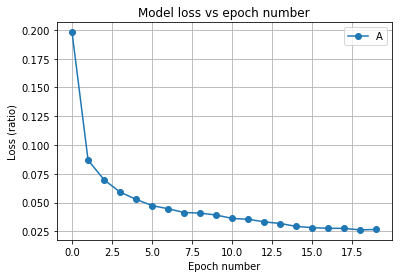

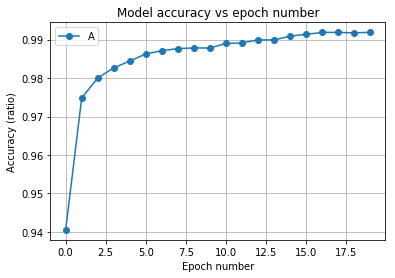

Evaluation and plotting runtime is: 8.2756 seconds


In [11]:
t_test_adadelta = time.time()
score_adadelta = network_adadelta.evaluate(X_test_adadelta, Y_test_adadelta, verbose=0)
print("When evaluated on the MNIST test dataset, the loss is: {0:1.4f}".format(score_adadelta[0]))
print("When evaluated on the MNIST test dataset, the acccuracy is: {0:1.4f}".format(score_adadelta[1]))
#Loss versus epochs
plt.plot(results_adadelta.history['loss'],'-o')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend("Adadelta")
plt.grid()
plt.show()

#Accuracy versus epochs
plt.plot(results_adadelta.history['acc'],'-o')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (ratio)")
plt.title("Model accuracy vs epoch number")
plt.legend("Adadelta")
plt.grid()
plt.show()

elapsed_test_adadelta = time.time() - t_test_adadelta
print("Evaluation and plotting runtime is: {0:1.4f}".format(elapsed_test_adadelta),"seconds")

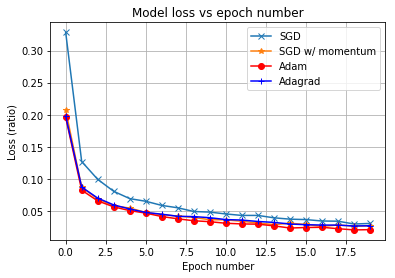

In [12]:
plt.plot(results_SGD.history['loss'],'-x',results_SGD_mom.history['loss'],'-*',results_adam.history['loss'],'-ro',results_adadelta.history['loss'],'-b+')
plt.title("Model loss vs epoch number")
plt.xlabel("Epoch number")
plt.ylabel("Loss (ratio)")
plt.legend(['SGD','SGD w/ momentum','Adam','Adagrad'])
plt.grid()
plt.show()

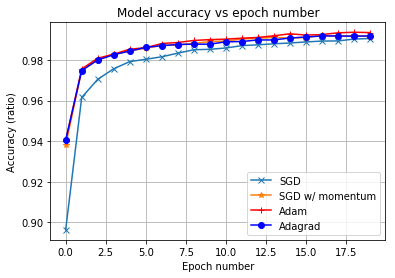

In [13]:
plt.plot(results_SGD.history['acc'],'-x',results_SGD_mom.history['acc'],'-*',results_adam.history['acc'],'-r+',results_adadelta.history['acc'],'-bo')
plt.xlabel("Epoch number")
plt.ylabel("Accuracy (ratio)")
plt.title("Model accuracy vs epoch number")
plt.legend(['SGD','SGD w/ momentum','Adam','Adagrad'])
plt.grid()
plt.show()